# 1 **Introduction**

##**1.1 Context**

> Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
> People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.



##**1.2 Attribute Information**
1.   Age: age of the patient [years]
2.   Sex: sex of the patient [M: Male, F: Female]
3.   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.   RestingBP: resting blood pressure [mm Hg]
5.   Cholesterol: serum cholesterol [mg/dl]
6.   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.   Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.   ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.   HeartDisease: output class [1: heart disease, 0: Normal]





#**2. Exploratory Data Analysis**

In [1]:
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 531 kB/s 
Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from nbpep8.nbpep8 import pep8

In [3]:
import os
import sys

In [4]:
#importing libraries 
#nainštalovanie knižníc

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import sklearn
import sklearn.model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [5]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [108]:
data=pd.read_csv('/content/drive/MyDrive/heart.csv')

In [7]:
data.shape

(918, 12)

In [10]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
# printing unique values in each column
# zobrazenie jedinečných hodnôt v každom stĺpci
print(data.Age.unique())
print(data.Sex.unique())
print(data.ChestPainType.unique())
print(data.RestingBP.unique())
print(data.Cholesterol.unique())
print(data.FastingBS.unique())
print(data.RestingECG.unique())
print(data.MaxHR.unique())
print(data.ExerciseAngina.unique())
print(data.Oldpeak.unique())
print(data.ST_Slope.unique())
print(data.HeartDisease.unique())

[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 22

In [20]:
colors = ['#FFFFFF', '#F9B1B8', '#EE4355', '#B60618', '#820815', '#000000']
corr = data.corr()
fig = go.Figure(data=go.Heatmap(z=corr,
                                x=corr.index.values,
                                y=corr.columns.values,
                                colorscale=colors,
                                text=corr.round(2), texttemplate="%{text}"
                                )
                )
fig.update_layout(title_text='Correlation Matrix',
                  title_x=0.5,
                  width=600, height=600
                  )
fig.show()

In [22]:
data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [25]:
x = ['Have HD', "Don't have HD"]
y = [508, 410]

fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])
fig.update_layout(title='Heart Disease Distribution')
fig.show()

In [28]:
fig = px.histogram(data, x="Sex", color='HeartDisease', barmode='group')
fig.update_layout(title='Distribution of Gender vs Heart Disease')
fig.show()

In [30]:
fig = px.histogram(data, x="Age", color="Sex")
fig.update_layout(title='Distribution of Age vs Gender')
fig.show()

In [32]:
fig = px.histogram(data, x="Age", color="HeartDisease", marginal="box")
fig.update_layout(title='Distribution of Age vs Heart Disease')
fig.show()

*   The likelihood of heart disease increases with age.
*   Pravdepodobnosť ochorenia srdca sa zvyšuje s vekom.



In [37]:
fig = px.histogram(data, x="ChestPainType",
                   color='HeartDisease',
                   barmode='group'
                   )
fig.update_layout(title='Distribution of Chest Pain Type vs Heart Disease')
fig.show()

*   ATA: Atypical Angina
*   NAP: Non-Anginal Pain
*   TA: Typical Angina
*   ASY: Asymptomatic


In [69]:
fig = px.histogram(data, x="RestingBP", color="HeartDisease", marginal="box")
fig.update_layout(title="Distribution of Blood Pressure vs Heart Disease")
fig.show()

In [44]:
fig = px.scatter(data, x="Age", y="RestingBP",
                 color=data["HeartDisease"].replace(
                     {0: "Don't have HD", 1: "Have HD"}),
                 opacity=0.5
                 )
fig.update_layout(title="Age vs Resting Blood Pressure")
fig.show()

In [47]:
fig = px.histogram(data, x="Cholesterol", color="HeartDisease", marginal="box")
fig.update_layout(title="Distribution of Cholesterol vs Heart Disease")
fig.show()

*    Healthy level: 125 - 200 mg/dl
*    Acceptably high level: 200 - 239 mg/dl
*    High level: 240 mg/dl and more


In [50]:
fig = px.histogram(data, x="FastingBS", color='HeartDisease', barmode='group')
fig.update_layout(title='Distribution of Fasting Blood Sugar vs Heart Disease')
fig.show()

*   Fasting blood sugar level indicate if pacient have diabetes. 
*  0 = level < 120 mg/dl, means patient don't have diabetes
*  1 = level > 120 mg/dl, means patient have diabetes






In [59]:
fig = px.histogram(data, x="RestingECG", color="HeartDisease", barmode='group')
fig.update_layout(title='Distribution of ECG Results vs Heart Disease')
fig.show()

*   Normal: Normal
*   ST: having ST-T wave abnormality
*   LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria


In [61]:
fig = px.histogram(data, x="MaxHR", color="HeartDisease", marginal="box")
fig.update_layout(title="Distribution of Maximum Heart Rate vs Heart Disease")
fig.show()

In [64]:
fig = px.scatter(data, x="Age", y="MaxHR",
                 color=data["HeartDisease"].replace(
                     {0: "Don't have HD", 1: "Have HD"}),
                 opacity=0.5
                 )
fig.update_layout(title="Distribution of Age vs Maximum Heart Rate")
fig.show()

In [67]:
fig = px.histogram(data, x="ExerciseAngina",
                   color="HeartDisease",
                   barmode='group'
                   )
fig.update_layout(title='Distribution of Exercise Angina vs Heart Disease')
fig.show()

*  Exercise Angina = is pain in the chest that comes on with exercise. 
*  Exercise Angina = bolesť hrudníka spôsobená cvičením.

In [71]:
fig = px.histogram(data, x="Oldpeak", color="HeartDisease", marginal="box")
fig.update_layout(title="Distribution of Oldpeak vs Heart Disease")
fig.show()



*   Oldpeak = numeric value measured in ST depression. 
*   Oldpeak > 1 is significant.




In [80]:
fig = px.histogram(data, x="ST_Slope", color="HeartDisease", barmode='group')
fig.update_layout(
              title='Distribution of the slope of ST segment vs Heart Disease'
              )
fig.show()

*   The ST segment slope is accurate ECG criterion for diagnosing significant coronary artery disease (CAD). 
*   Up: upsloping
*   Flat: flat
*   Down: downsloping



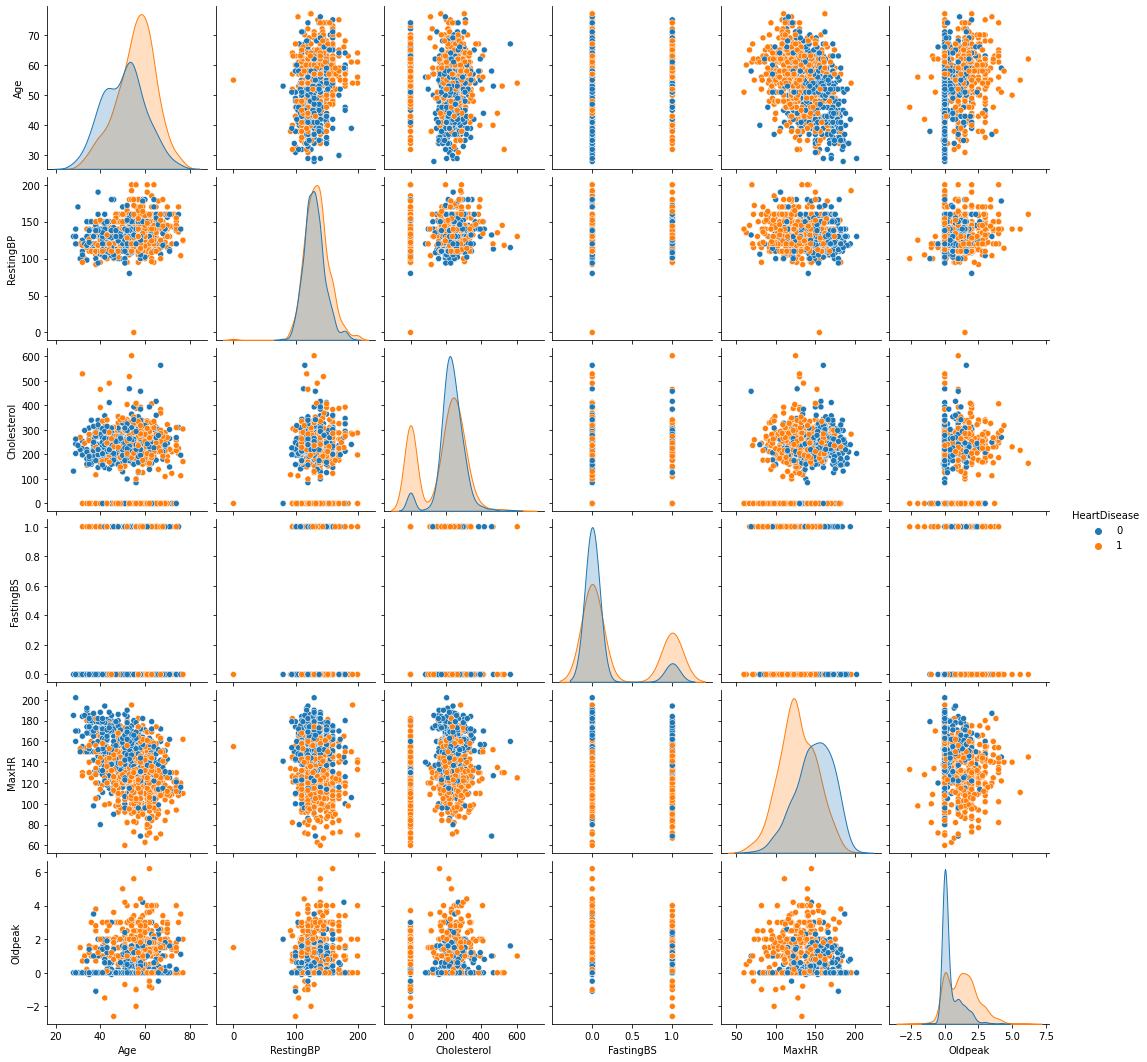

In [82]:
# making scatter plots to visualise relations between features
# vytvorenie korelačných diagramov na  vizualizáciu vzťahov medzi prvkami
sns.pairplot(data, hue='HeartDisease')

We can see some unreal values here, for example resting blood presure can't be 0. 

# **3. Preprocesing**

##**3.1 Missing values**

In [84]:
# searching for missing values in dataset
# kontrola či dataset obsahuje chýbajúce hodnoty
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##**3.2 Duplicates**

In [86]:
# searching for duplicates in dataset
# kontrola či dataset obsahuje duplikáty
data.duplicated().sum()

0

##**3.3 Erroneous values**

In [91]:
data.shape

(904, 11)

In [105]:
# removing erroneous values (restingBP or cholesterol can't be 0)
# removing rows with RestingBP=0
# too much observations had Cholesterol=0,
# removing whole collumn because it doesn't have big impact on model performance
# removing rows with negative Oldpeak
# odstránenie chybných hodnôt (krvný tlak ani cholesterol nemôžu byť 0)
# odstránenie riadkov s krvným tlakom = 0
# príliž veľa pozorovaní malo cholesterol = 0,
# odstránime celý stĺpec pretože nemá veľký vplyv na presnosť modelu
# odstránenie riadkov kde je hodnota oldpeak negatívna
data = data[data['RestingBP'] > 0]
data = data.drop('Cholesterol', axis=1)
data = data[data['Oldpeak'] >= 0]

In [ ]:
data.shape

(904, 11)

##**3.4 Dummy variables**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             904 non-null    int64  
 1   Sex             904 non-null    object 
 2   ChestPainType   904 non-null    object 
 3   RestingBP       904 non-null    int64  
 4   FastingBS       904 non-null    int64  
 5   RestingECG      904 non-null    object 
 6   MaxHR           904 non-null    int64  
 7   ExerciseAngina  904 non-null    object 
 8   Oldpeak         904 non-null    float64
 9   ST_Slope        904 non-null    object 
 10  HeartDisease    904 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 84.8+ KB


In [109]:
# spliting dataset to numerical and categorical variables
# converting categorical variables to dummy variables
# merging numerical and categorical variables back to one dataset
# rozdelenie datasetu na numerické a kategorické premenné
# konvertovanie kategorických premenných na dummies
# zlúčenie datasetu späť do jedného
numerical_cols = data[["Age", "RestingBP",
                       "FastingBS", "MaxHR",
                       "Oldpeak", "HeartDisease"
                       ]]
categorical_cols = data[["Sex", "ChestPainType",
                         "RestingECG", "ExerciseAngina",
                         "ST_Slope"
                         ]]

for col in categorical_cols:
    categorical_cols = pd.get_dummies(categorical_cols,
                                      columns=[col],
                                      prefix=[col]
                                      )

data = pd.concat([numerical_cols, categorical_cols], axis=1)
data.head()

##**3.5 Train Test Split**

In [112]:
# spliting dataset into train and test split, dropping target variable
# rozdelenie datasetu na trénovací a testovací, odstránenie cieľovej premennej
X = data.drop(["HeartDisease"], axis=1)
y = data["HeartDisease"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.20, random_state=42
    )

numerical_features = numerical_cols.columns.to_list()
numerical_features.remove("HeartDisease")

print(X_train.shape)
print(X_test.shape)

(734, 19)
(184, 19)


##**3.6 Scaling**

In [114]:
# scaling dataset
# škálovanie datasetu
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Models**

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [118]:
# printing various model's accuracy score with default hyperparameters
# zobrazenie presnosti rôznych modelov s prednastavenými hyperparametrami
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Bagging Classifier', BaggingClassifier()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(("Light GBM Classifier", LGBMClassifier()))

for name, model1 in models:
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    score = sklearn.metrics.accuracy_score(y_test, y_pred)
    print(name, "Score: {:.8f}".format(score))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Score: 0.86413043
Gaussian NB Score: 0.84239130
KNN Score: 0.61956522
SVC Score: 0.66304348
Decision Tree Classifier Score: 0.78260870
Random Forest Classifier Score: 0.85869565
Bagging Classifier Score: 0.82608696
Gradient Boosting Classifier Score: 0.83695652
Light GBM Classifier Score: 0.83152174


I picked 3 models with best score.

In [126]:
# defining a function to train model and make confusion matrix
# definovanie funkcie na trénovanie modelu a vytvorenie konfúznej matice
def model_train(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    print(plot_confusion_matrix(model, X_test_scaled, y_test))

##**4.1 Logistic Regression**

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



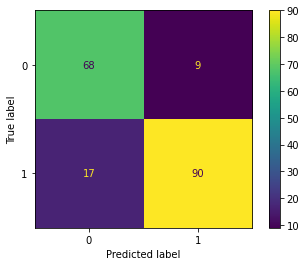

In [128]:
# training a logistic regression model with default hyperparameters
# printing it's score
# trénovanie modelu logistickej regresie s predvolenými hyperparametrami
# vytlačenie jeho skóre
model_train(LogisticRegression())

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



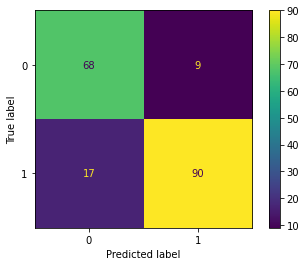

In [134]:
# using gridsearch to find the best hyperparameters for LR model
# training model with those hyperparameters and printing it's score
# použitie gridsearch na nájdenie najlepších hyperparametrov pre model LR
# trénovanie modelu s najlepšími hyperparametrami a vytlačenie jeho skóre
param_gridLR = {'C': np.logspace(0.001, 10), 'penalty': ["l1", 'l2']}
gridLR = GridSearchCV(param_grid=param_gridLR,
                      estimator=LogisticRegression(solver="liblinear"),
                      scoring='accuracy',
                      error_score='raise'
                      )
# seting solver to liblinear because it can work with both l1 and l2 penalty
# nastavenie riešitela na liblinear, pretože je kompatibilný s l1 aj l2
gridLR.fit(X_train_scaled, y_train)
gridLR.predict(X_test_scaled)
y_predLR = gridLR.predict(X_test_scaled)
print(classification_report(y_test, y_predLR))
print(plot_confusion_matrix(gridLR, X_test_scaled, y_test))

In [ ]:
gridLR.best_params_

{'C': 1.0023052380778996, 'penalty': 'l2'}

##**4.2 Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.88      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



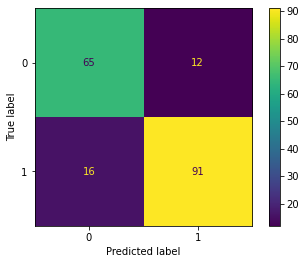

In [136]:
# training a RF model with default hyperparameters and printing it's score
# trénovanie modelu RF s predvolenými hyperparametrami a vytlačenie jeho skóre
model_train(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

cell_content.py:10:21: E128 continuation line under-indented for visual indent
cell_content.py:11:21: E124 closing bracket does not match visual indentation



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



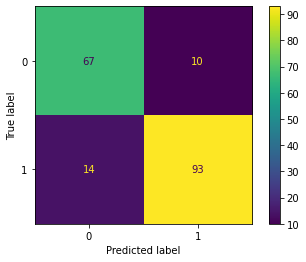

In [139]:
# using gridsearch to find the best hyperparameters for RF model
# použitie gridsearch na nájdenie najlepších hyperparametrov pre model RF
param_gridRF = {'n_estimators': [200, 300, 400, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [4, 5, 6, 7, 8],
                'criterion': ['gini', 'entropy']
                }

gridRF = GridSearchCV(estimator=RandomForestClassifier(),
                      param_grid=param_gridRF, cv=5
                      )
gridRF.fit(X_train_scaled, y_train)
y_predRF = gridRF.predict(X_test_scaled)
print(classification_report(y_test, y_predRF))
print(plot_confusion_matrix(gridRF, X_test_scaled, y_test))

In [141]:
# the best parameters for  model RF
# najlepšie parametre pre model RF
gridRF.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

##**4.3 Gradient Boosting Classifier**

              precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



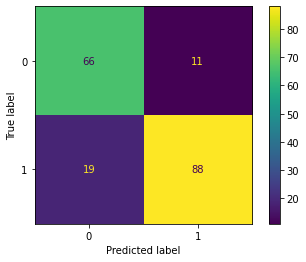

In [143]:
# training a GB model with default hyperparameters and printing it's score
# trénovanie modelu GB s predvolenými hyperparametrami a vytlačenie jeho skóre
model_train(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

cell_content.py:8:7: E225 missing whitespace around operator



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



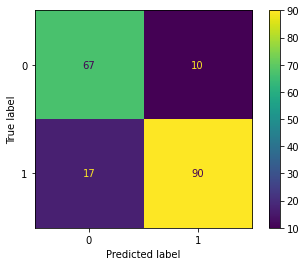

In [144]:
# using gridsearch to find the best hyperparameters for GB model
# použitie gridsearch na nájdenie najlepších hyperparametrov pre model GB
param_gridGB = {"n_estimators": [5, 50, 250, 500],
                "max_depth": [1, 3, 5, 7, 9],
                "learning_rate": [0.01, 0.1, 1, 10, 100]
                }

gridGB = GridSearchCV(estimator=GradientBoostingClassifier(),
                    param_grid=param_gridGB,
                    cv=5
                    )
gridGB.fit(X_train_scaled, y_train)
y_predGB = gridGB.predict(X_test_scaled)
print(classification_report(y_test, y_predGB))
print(plot_confusion_matrix(gridGB, X_test_scaled, y_test))

In [146]:
# the best parameters for GB model
# najlepšie parametre pre model GB
gridGB.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

#**5. Feature importance**

In [149]:
# creating new variables with name of columns
# vytvorenie nových premenných s názvami stĺpcov
cols = ["Age", "RestingBP", "FastingBS", "MaxHR", "Oldpeak", "Sex_F", "Sex_M",
        "ChestPainType_ASY", "ChestPainType_ATA", "ChestPainType_NAP",
        "ChestPainType_TA", "RestingECG_LVH", "RestingECG_Normal",
        "RestingECG_ST", "ExerciseAngina_N", "ExerciseAngina_Y",
        "ST_Slope_Down", "ST_Slope_Flat", "ST_Slope_Up"
        ]
X_train_std = pd.DataFrame(X_train_scaled, columns=cols)
X_test_std = pd.DataFrame(X_test_scaled, columns=cols)

In [156]:
# training RF model with the best hyperparameters from gridsearch
# trénovanie modelu RF s parametrami z gridsearch
rf = RandomForestClassifier(criterion='gini',
                            max_depth=5,
                            max_features='auto',
                            n_estimators=200
                            )
rf.fit(X_train_std, y_train.values.ravel())

##**5.1 Built-in Feature Importance**

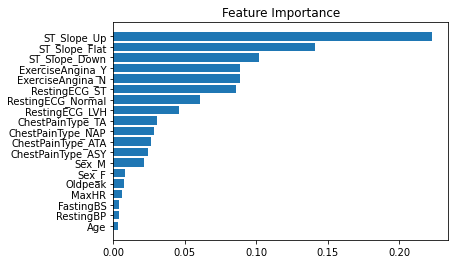

In [157]:
importances = rf.feature_importances_
sorted_names = importances.argsort()

plt.barh(cols, importances[sorted_names])
plt.title('Feature Importance')

##**5.2 Permutation Based Feature Importance**

In [153]:
from sklearn.inspection import permutation_importance

In [159]:
perm_importance = permutation_importance(rf, X_test_std, y_test)

Text(0.5, 1.0, 'Permutation Importance')

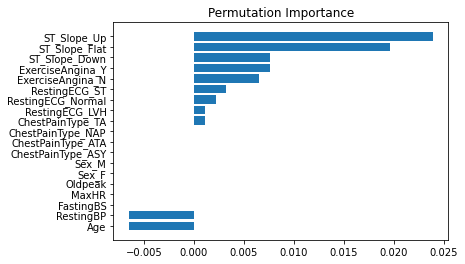

In [161]:
sorted_names_permutation = perm_importance.importances_mean.argsort()
plt.barh(cols, perm_importance.importances_mean[sorted_names_permutation])
plt.title('Permutation Importance')

##**5.3 Feature Importance Computed with SHAP Values**

In [162]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 33.2 MB/s 


In [163]:
import shap

In [166]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_std)

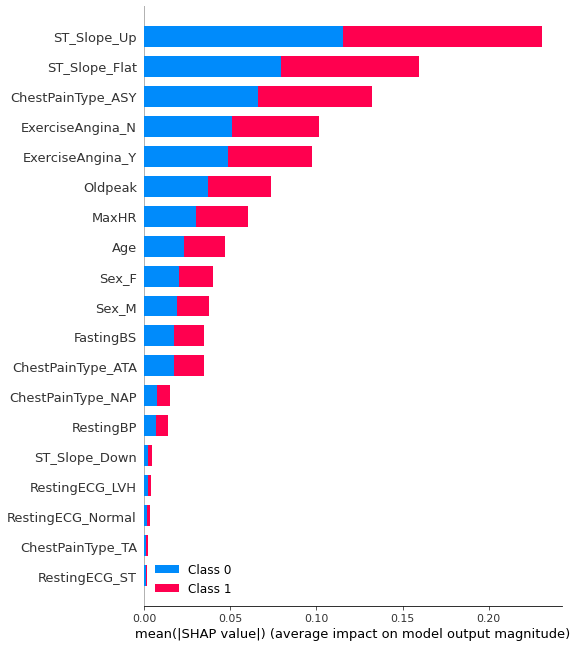

In [168]:
shap.summary_plot(shap_values, X_test_std, plot_type= "bar")

# **6. Conclusion**

*   The best performing model based on Recall was Random Forest Classifier with the best score of 0.90. (I choose this metric to compare models because in medical field the repercussion of misclassifying a false negative can be fatal.)
*   5 most important features that affected the outcome of RFC based on build-in feature importance and Permutation based feature importance are ST_Slope_Up, ST_Slope_Flat, ST_Slope_Down, ExerciseAngina_Y and ExerciseAngina_N.
*   5 most important features that affected the outcome of RFC computed with SHAP Values are ST_Slope_Up, ST_Slope_Flat, ChestPainType_ASY, ExerciseAngina_N and ExerciseAngina_Y.





